In [28]:
import networkx as nx
import gurobipy as gb

from IPython.display import SVG

## Campus map graph

In [29]:
buildings = ['Delta6','Hospital','Block11A',\
             'Block11E','Coppito2','Coppito1',\
             'Block0','Lab','ComputerCenter']

In [30]:
G = nx.Graph()

G.add_nodes_from(buildings)

print(G.number_of_nodes())
print(G.number_of_edges())




9
0


In [46]:
G.add_edge('Delta6','Hospital')
G.add_edge('Delta6','Block11A')
G.add_edge('Block11A','Hospital')
G.add_edge('Block11E','Hospital')
G.add_edge('Block11E','Coppito2')
G.add_edge('Coppito1','Coppito2')
G.add_edge('Block0','Coppito2')
G.add_edge('Coppito1','Block0')
G.add_edge('Block0','Lab')
G.add_edge('Lab','ComputerCenter')
G.add_edge('ComputerCenter','Block0')

print (G.number_of_edges())
print (G.edges())

11
[('Delta6', 'Hospital'), ('Delta6', 'Block11A'), ('Hospital', 'Block11A'), ('Hospital', 'Block11E'), ('Block11E', 'Coppito2'), ('Coppito2', 'Coppito1'), ('Coppito2', 'Block0'), ('Coppito1', 'Block0'), ('Block0', 'Lab'), ('Block0', 'ComputerCenter'), ('Lab', 'ComputerCenter')]


In [32]:
%matplotlib inline
pos = nx.spring_layout(G)
#pos

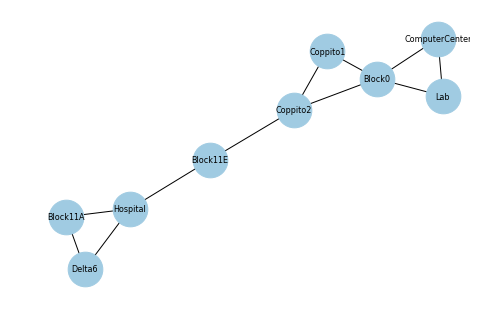

In [33]:
nx.draw(G,pos,node_color='#A0CBE2',width=1,node_size=1200,with_labels=True,hold=None, font_size=8)

In [11]:
import pygraphviz

ModuleNotFoundError: No module named 'pygraphviz'

In [19]:
D = nx.nx_agraph.to_agraph(G)
D

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [36]:
D.node_attr.update (fontsize='10')
D.graph_attr.update(splines='true')

D.draw('img.svg', prog='neato')
SVG('img.svg')

NameError: name 'D' is not defined

In [38]:
subsets = {}
#type(subsets)

In [50]:
for i in G.nodes():
    coverednodes = list(G.neighbors(i)) + [i]
    subsets[i] = coverednodes

subsets

{'Block0': ['Coppito2', 'Coppito1', 'Lab', 'ComputerCenter', 'Block0'],
 'Block11A': ['Delta6', 'Hospital', 'Block11A'],
 'Block11E': ['Hospital', 'Coppito2', 'Block11E'],
 'ComputerCenter': ['Lab', 'Block0', 'ComputerCenter'],
 'Coppito1': ['Coppito2', 'Block0', 'Coppito1'],
 'Coppito2': ['Block11E', 'Coppito1', 'Block0', 'Coppito2'],
 'Delta6': ['Hospital', 'Block11A', 'Delta6'],
 'Hospital': ['Delta6', 'Block11A', 'Block11E', 'Hospital'],
 'Lab': ['Block0', 'ComputerCenter', 'Lab']}

## Decision variables



$$x_i = \begin{cases} 1 \text{ if subset } i \text { is selected (if facility is opened on building) }\\ 0 \text{ otherwise.}  \end{cases}$$

In [40]:
setcovering = gb.Model()

x = setcovering.addVars(buildings, vtype=gb.GRB.BINARY, name='x')

x

{'Block0': <gurobi.Var x[Block0]>,
 'Block11A': <gurobi.Var x[Block11A]>,
 'Block11E': <gurobi.Var x[Block11E]>,
 'ComputerCenter': <gurobi.Var x[ComputerCenter]>,
 'Coppito1': <gurobi.Var x[Coppito1]>,
 'Coppito2': <gurobi.Var x[Coppito2]>,
 'Delta6': <gurobi.Var x[Delta6]>,
 'Hospital': <gurobi.Var x[Hospital]>,
 'Lab': <gurobi.Var x[Lab]>}

## Objective function

In [41]:
setcovering.setObjective(x.sum(), gb.GRB.MINIMIZE)
setcovering.write('setcov.lp')

## Constraints 

$$
\sum_{i \in S(j)} x_i \ge 1 \;\;\; j \in V
$$

In [42]:
setcovering.addConstrs((x.sum(subsets[j]) >=1 for j in subsets),\
                       name='Cover')

{'Block0': <gurobi.Constr *Awaiting Model Update*>,
 'Block11A': <gurobi.Constr *Awaiting Model Update*>,
 'Block11E': <gurobi.Constr *Awaiting Model Update*>,
 'ComputerCenter': <gurobi.Constr *Awaiting Model Update*>,
 'Coppito1': <gurobi.Constr *Awaiting Model Update*>,
 'Coppito2': <gurobi.Constr *Awaiting Model Update*>,
 'Delta6': <gurobi.Constr *Awaiting Model Update*>,
 'Hospital': <gurobi.Constr *Awaiting Model Update*>,
 'Lab': <gurobi.Constr *Awaiting Model Update*>}

In [43]:
setcovering.update()
setcovering.write('setcov.lp')

In [44]:
setcovering.optimize()

Optimize a model with 9 rows, 9 columns and 31 nonzeros
Variable types: 0 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 9 rows and 9 columns
Presolve time: 0.08s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.17 seconds
Thread count was 1 (of 4 available processors)

Solution count 2: 2 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+00, best bound 2.000000000000e+00, gap 0.0000%


In [45]:

print('Obj: %g' % setcovering.objVal)

print ()

for v in setcovering.getVars():
    if v.x > 0:
        print ('%s=%g' % (v.varName, v.x), end = ' ')
    

Obj: 2

x[Hospital]=1 x[Block0]=1 